In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_amsterdam_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('amsterdam')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/amsterdam_{date}.csv',index=False)
get_listings_amsterdam_timeseries()

In [3]:
# pull in detailed_listings
raw_df_amsterdam = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_amsterdam)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(amsterdam_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 5402 AirBnb listings.


In [4]:
amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2020-12.csv')
amsterdam_raw_df_12_12_2020.shape





(18522, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for amsterdam
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_amsterdam = glob.glob('amsterdam/**.csv')
files_amsterdam

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['amsterdam/Amsterdam_2021-07.csv',
 'amsterdam/Amsterdam_2021-06.csv',
 'amsterdam/Amsterdam_2021-04.csv',
 'amsterdam/Amsterdam_2021-10.csv',
 'amsterdam/Amsterdam_2021-11.csv',
 'amsterdam/Amsterdam_2021-05.csv',
 'amsterdam/Amsterdam_2021-01.csv',
 'amsterdam/Amsterdam_2021-02.csv',
 'amsterdam/Amsterdam_2021-03.csv',
 'amsterdam/Amsterdam_2020-12.csv',
 'amsterdam/Amsterdam_2021-08.csv',
 'amsterdam/Amsterdam_2021-09.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(amsterdam_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_12_12_2020['price'].mean(),2)}.")

amsterdam_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(amsterdam_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_1_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(amsterdam_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_2_8_2021['price'].mean(),2)}.")

amsterdam_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(amsterdam_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_3_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(amsterdam_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_4_9_2021['price'].mean(),2)}.")

#amsterdam_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(amsterdam_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_5_19_2021['price'].mean(),2)}.")

amsterdam_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(amsterdam_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_6_3_2021['price'].mean(),2)}.")

amsterdam_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(amsterdam_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_7_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(amsterdam_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_8_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(amsterdam_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_9_7_2021['price'].mean(),2)}.")

amsterdam_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(amsterdam_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_10_6_2021['price'].mean(),2)}.")

#amsterdam_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(amsterdam_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18522 AirBnb listings; the avg price is €154.0.
The 1_9_2021 dataset contains 18395 AirBnb listings; the avg price is €152.58.
The 2_8_2021 dataset contains 18291 AirBnb listings; the avg price is €153.06.
The 3_4_2021 dataset contains 18201 AirBnb listings; the avg price is €153.72.
The 4_9_2021 dataset contains 17825 AirBnb listings; the avg price is €154.5.
The 6_3_2021 dataset contains 16973 AirBnb listings; the avg price is €154.17.
The 7_4_2021 dataset contains 16724 AirBnb listings; the avg price is €156.16.
The 8_6_2021 dataset contains 16478 AirBnb listings; the avg price is €156.87.
The 9_7_2021 dataset contains 16116 AirBnb listings; the avg price is €156.91.
The 10_6_2021 dataset contains 5389 AirBnb listings; the avg price is €166.99.


In [7]:
df_list_amsterdam = [amsterdam_raw_df_12_12_2020, amsterdam_raw_df_1_9_2021, amsterdam_raw_df_2_8_2021,
           amsterdam_raw_df_3_4_2021, amsterdam_raw_df_4_9_2021,  amsterdam_raw_df_6_3_2021, amsterdam_raw_df_7_4_2021,
           amsterdam_raw_df_8_6_2021, amsterdam_raw_df_9_7_2021, amsterdam_raw_df_10_6_2021]

dates_amsterdam = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_amsterdam = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_amsterdam = []

def airbnb_parse_amsterdam(df_list, files):
    for file in files_amsterdam:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_{file}.csv")
        print(f"The {file} amsterdam dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_amsterdam(df_list, dates):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_{file}.csv")
        #print(f"The {date} amsterdam dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_amsterdam.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_amsterdam)

amsterdam_parse = airbnb_parse_amsterdam(df_list_amsterdam, files_amsterdam)


The 2020-12 amsterdam dataset contains 18522 AirBnb listings -- the avg price is €154.0.
The 2021-01 amsterdam dataset contains 18395 AirBnb listings -- the avg price is €152.58.
The 2021-02 amsterdam dataset contains 18291 AirBnb listings -- the avg price is €153.06.
The 2021-03 amsterdam dataset contains 18201 AirBnb listings -- the avg price is €153.72.
The 2021-04 amsterdam dataset contains 17825 AirBnb listings -- the avg price is €154.5.
The 2021-06 amsterdam dataset contains 16973 AirBnb listings -- the avg price is €154.17.
The 2021-07 amsterdam dataset contains 16724 AirBnb listings -- the avg price is €156.16.
The 2021-08 amsterdam dataset contains 16478 AirBnb listings -- the avg price is €156.87.
The 2021-09 amsterdam dataset contains 16116 AirBnb listings -- the avg price is €156.91.
The 2021-10 amsterdam dataset contains 5389 AirBnb listings -- the avg price is €166.99.


In [8]:
amsterdam_summary = airbnb_to_frame_amsterdam(df_list_amsterdam, files_amsterdam)
amsterdam_summary['Date of scrape'] = pd.to_datetime(amsterdam_summary['Date of scrape'])
amsterdam_summary['City'] = 'amsterdam'
amsterdam_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,18522,154.00,128.0,0,8000,0.64,amsterdam
1,2021-01-01,18395,152.58,126.0,0,8000,0.61,amsterdam
2,2021-02-01,18291,153.06,128.0,0,8000,0.59,amsterdam
3,2021-03-01,18201,153.72,129.0,0,8000,0.58,amsterdam
4,2021-04-01,17825,154.50,129.0,0,8000,0.56,amsterdam
5,2021-06-01,16973,154.17,128.0,0,8000,0.61,amsterdam
6,2021-07-01,16724,156.16,129.0,0,8000,0.61,amsterdam
7,2021-08-01,16478,156.87,130.0,0,8000,0.64,amsterdam
8,2021-09-01,16116,156.91,130.0,0,8000,0.68,amsterdam
9,2021-10-01,5389,166.99,140.0,0,6477,1.37,amsterdam


In [9]:
amsterdam_summary_listings = amsterdam_summary[['Date of scrape','# of Listings']]
amsterdam_summary_listings.set_index('Date of scrape', inplace=True)


amsterdam_summary_prices_avg = amsterdam_summary[['Date of scrape', 'Avg Price']]
amsterdam_summary_prices_avg.set_index('Date of scrape', inplace=True)

amsterdam_summary_prices_median = amsterdam_summary[['Date of scrape', 'Median Price']]
amsterdam_summary_prices_median.set_index('Date of scrape', inplace=True)

amsterdam_summary_reviews_permonth = amsterdam_summary[['Date of scrape', 'Avg reviews per month']]
amsterdam_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

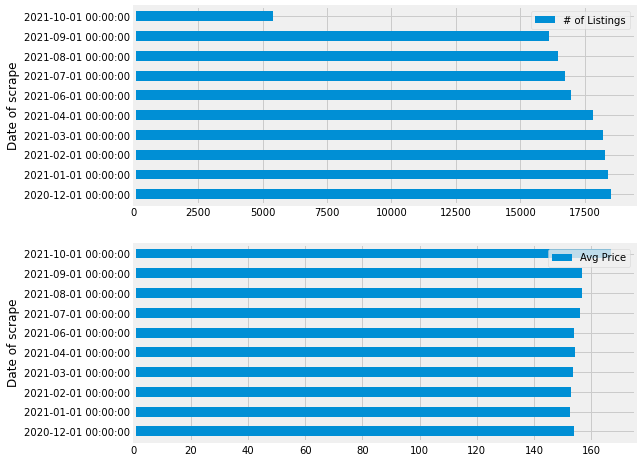

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

amsterdam_summary_listings.plot(ax=ax1, kind='barh')
amsterdam_summary_prices_avg.plot(ax=ax2, kind='barh')

In [11]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

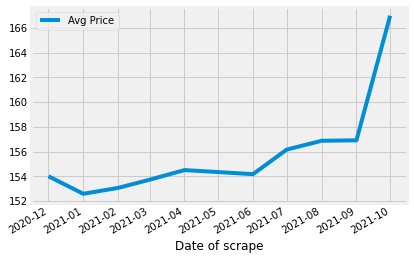

In [12]:
amsterdam_summary.plot(x='Date of scrape', y='Avg Price')

In [13]:
master_df_amsterdam = pd.concat(df_list_amsterdam)
master_df_amsterdam = master_df_amsterdam[master_df_amsterdam['room_type']=='Entire home/apt']
master_df_amsterdam_unique = master_df_amsterdam.drop_duplicates(subset='id')
#master_df_amsterdam_unique = master_df_amsterdam[master_df_amsterdam_unique['room_type']=='Entire home/apt']
master_df_amsterdam_unique['room_type'].value_counts()

Entire home/apt    15840
Name: room_type, dtype: int64

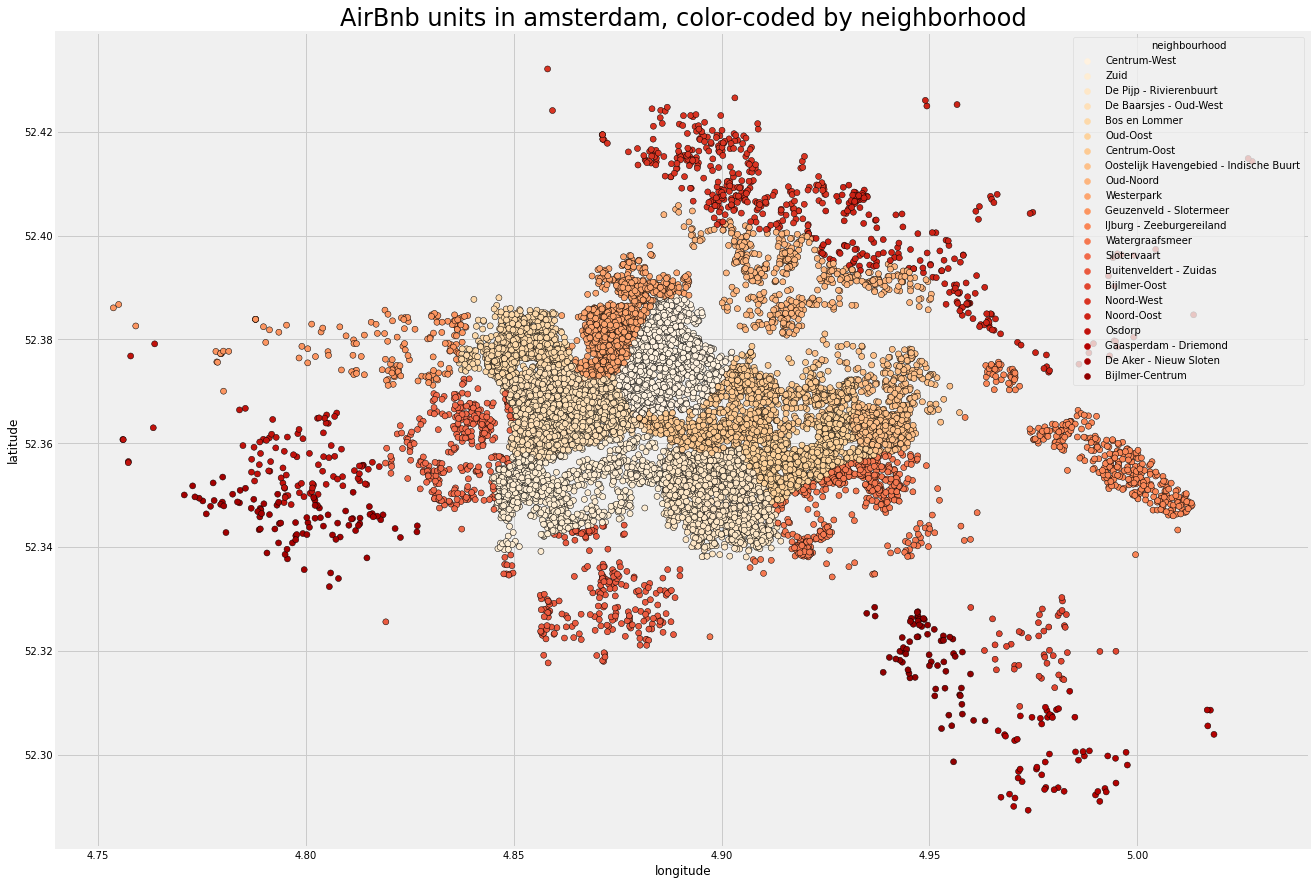

In [14]:
title = 'AirBnb units in amsterdam, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_amsterdam_unique.longitude, master_df_amsterdam_unique.latitude, hue = master_df_amsterdam_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_amsterdam.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([amsterdam_raw_df_10_6_2021,raw_df_amsterdam],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(3567, 75)

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  119.91984254519247
Coefficients:  [ -1.56704475   2.55671905   1.48974523   0.15505792 -14.80808797
   0.20842037  10.82308319   6.14034309  11.67477302]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(3210, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

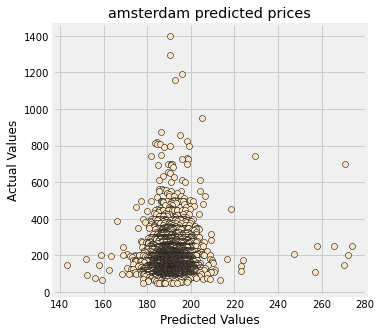

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('amsterdam predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([4129, 5035, 1803, 1712,  236, 2197, 2999, 5146, 2632, 2900,
            ...
            3907, 1478, 2892, 3284, 3993, 1536,  317, 3908, 2527, 1260],
           dtype='int64', length=3210)

In [23]:
raw_df_amsterdam.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,"Quiet Garden View Room & Super Fast WiFi<br /><br /><b>The space</b><br />I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, <br /><br />The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the ""Indische Buurt"". Amsterdam’s historic centre is less than 15 minutes away by bike or tram.<br /><br /><br />The features of the room are:<br /><br />- Twin beds (80 x 200 cm, down quilts and pillows) <br />- 2 pure cotton towels for each guest <br />- reading lamps<br />- bedside table<br />- wardrobe<br />- table with chairs<br />- tea and coffee making facilities<br />- mini bar<br />- alarm clock<br />- Hi-Fi system with cd player, connection for mp3 player / phone<br />- map of Amsterdam and public transport<br />- Wi-Fi Internet connection <br /><br />Extra services:<br /><br />- Bike rental<br /><br /><b>License number</b><br />0363 5F3A 5684 6750 D14D","Indische Buurt (""Indies Neighborhood"") is a neighbourhood in the eastern portion of the city of Amsterdam, in the Dutch province of Noord-Holland. The name dates from the early 20th century and is derived from the fact that the neighbourhood's streets are named after islands and other geographical concepts in the former Dutch colony of the Dutch East Indies. The first street was named in 1902. In 2003, there were around 23,357 inhabitants. The neighbourhood is bounded on the west by the railroad Amsterdam - Hilversum (with the Muiderpoort Station), on the east side by Flevopark, on the north side by Zeeburgerdijk and on the south side by the Ringvaart Watergraafsmeer. Indische Buurt is the oldest part of the Zeeburg district and is very ethnically diverse, and a high percentage of the population is of immigrant origin (for Zeeburg this is already high at 55%, but higher in the Indische Buurt) and there are an estimated 100 languages spoken.",https://a0.muscache.com/pictures/10272854/8dcca016_original.jpg,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,"17th century Dutch townhouse in the heart of the city. no public transport needed! Located a stones throw from Rembrandt Square, Dam Square, Leidse Square and Flower Market. Walking distance from Central Station.<br />Comfortable, cosy, lockable studio with comfortable bed and with private bathroom, double glazed windows and night blackout curtains, flat screen TV and mini fridge, Wi-Fi. No bathtub only shower. No kitchen. No curfew. You feel 100% privacy. Maximum for 2 persons!<br /><br /><b>The space</b><br />For those who like all facets of city life. In the streets surrounding the house, there are lots of antique shops, and for those who are into browsing for antiques. The Rijksmuseum is a short walk away. The famous nine-streets with all its little boutique shops, cafes, restaurants and whatnot is also around the corner. The Dam Square, Leidse Square and Rembrandt Squarejust minutes to walk.<br />No Curfew and you feel 100% privacy. <br />Hair dryer, towels and linens are included","Located just in between famous central canals. In the streets surrounding the house, there are lots of antique shops, and for those who are into browsing for antiques. The Rijksmuseum is a short walk away. The famous nine-streets with all its little boutique shops, cafes, restaurants and whatnot is also around the corn

In [24]:
df_result['id'] = df_result.index.values
df_result.shape

(3210, 4)

In [25]:
raw_df_amsterdam.index.values
df_result.index.values

array([4129, 5035, 1803, ..., 3908, 2527, 1260])

In [26]:
df_result_merge = df_result.merge(raw_df_amsterdam, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(5402, 77)

In [27]:
df_join = df_result.join(raw_df_amsterdam, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                            0
Predicted                                         0
Diff                                              0
id_x                                              0
id_y                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               245
Length: 78, dtype: int64

In [28]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [29]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_amsterdam = df_print[df_print['Predicted']>0]
df_print_amsterdam.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
4129,4129,1400.0,$307.00,190.471737,-1209.528263,https://www.airbnb.com/rooms/40559714,52.35550,4.90160,6,De Pijp - Rivierenbuurt,5.00,5.00,5.00,5.00,5.00,5.00,4.67,3
5035,5035,1295.0,$95.00,190.255780,-1104.744220,https://www.airbnb.com/rooms/50653774,52.38318,4.91488,2,Oud-Noord,5.00,5.00,4.80,5.00,5.00,5.00,5.00,5
1803,1803,1190.0,$250.00,195.799311,-994.200689,https://www.airbnb.com/rooms/15431815,52.36517,4.94839,4,Oostelijk Havengebied - Indische Buurt,4.90,4.93,4.68,4.97,4.97,4.65,4.65,31
1712,1712,1160.0,$49.00,192.814691,-967.185309,https://www.airbnb.com/rooms/14526096,52.35197,5.00199,1,IJburg - Zeeburgereiland,4.92,4.99,4.99,4.92,4.97,4.73,4.83,76
236,236,950.0,$950.00,205.094285,-744.905715,https://www.airbnb.com/rooms/1038120,52.38865,4.88392,4,Westerpark,4.98,4.89,4.93,4.91,4.95,4.86,4.74,45


In [30]:
df_print_amsterdam['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    504
Centrum-West                              473
Centrum-Oost                              348
De Pijp - Rivierenbuurt                   332
Zuid                                      238
Westerpark                                223
Oud-Oost                                  188
Oud-Noord                                 135
Bos en Lommer                             129
Oostelijk Havengebied - Indische Buurt    125
IJburg - Zeeburgereiland                   88
Watergraafsmeer                            80
Noord-West                                 77
Slotervaart                                50
Geuzenveld - Slotermeer                    43
Noord-Oost                                 42
Buitenveldert - Zuidas                     29
Gaasperdam - Driemond                      26
Osdorp                                     25
De Aker - Nieuw Sloten                     24
Bijlmer-Centrum                            18
Bijlmer-Oost                      

In [31]:
df_print_amsterdam_final = df_print_amsterdam.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_amsterdam_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [32]:
df_amsterdam_query = df_print_amsterdam_final.query('number_of_reviews >11 & accommodates <=6')
df_amsterdam_query.shape
#df_amsterdam_query.head()

(1908, 18)

In [33]:
df_amsterdam_query_filter = df_amsterdam_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_amsterdam_query_filter.shape


(1428, 18)

In [34]:
df_amsterdam_query_filter.shape

(1428, 18)

In [35]:
df_neighborhood_plot = df_print_amsterdam_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
6,De Aker - Nieuw Sloten,213.521739
9,Gaasperdam - Driemond,209.230769
10,Geuzenveld - Slotermeer,208.882353
15,Osdorp,208.500000
16,Oud-Noord,208.375000
18,Slotervaart,206.630435
17,Oud-Oost,205.320000
5,Centrum-West,199.410835
19,Watergraafsmeer,196.771429
4,Centrum-Oost,196.028662


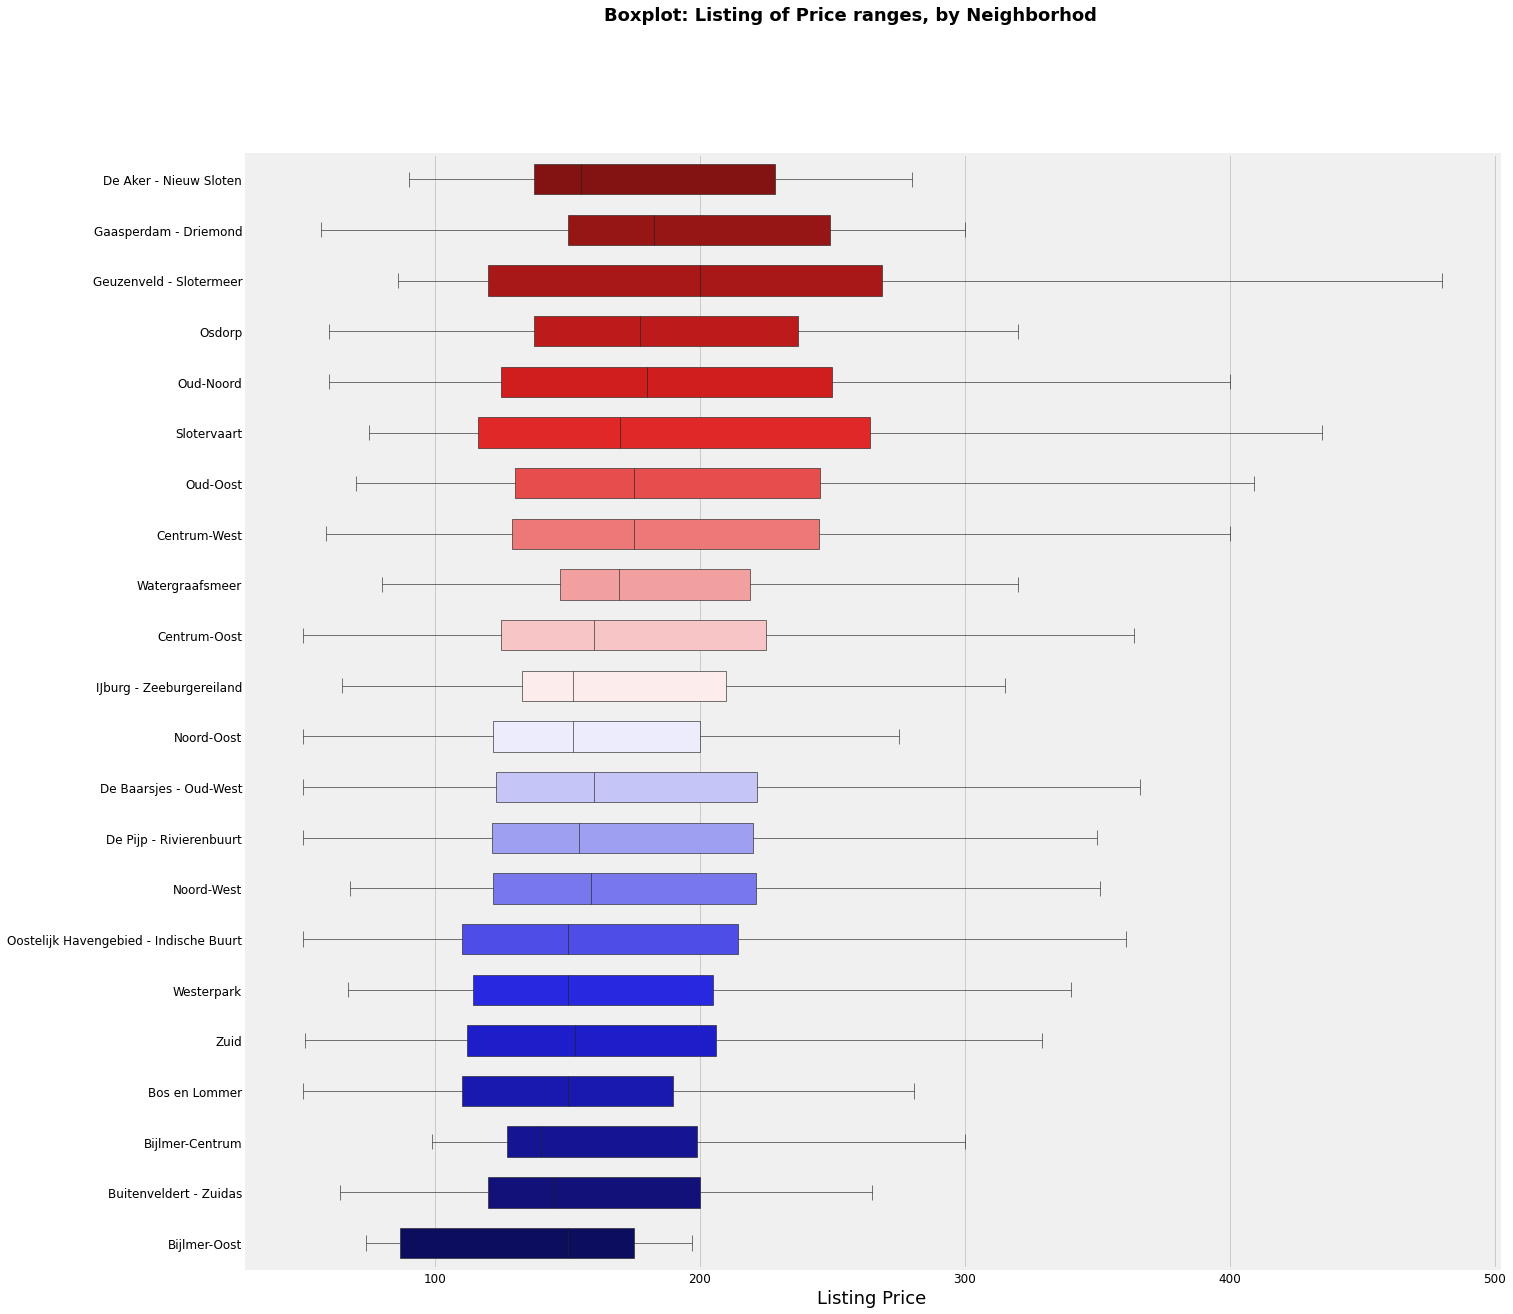

In [83]:
df_neighborhood_plot = df_print_amsterdam_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(20,15))
dft = df_print_amsterdam_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

fig.savefig('amsterdam_neighborhood_boxplot.png')

In [37]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [38]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_amsterdam)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 5402 files in the dataset
There is 3020 to be regressed with accommodates <=4


In [39]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  138.79735211158504
Coefficients:  [ -1.87464142   4.06112203   0.39697952   0.13429838 -22.47039852
   3.24902277  15.59232076   1.78565413  12.16149072]
LinearRegression()


In [40]:
y_pred2_4 = regr4.predict(X_4)

In [41]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(3012, 3)

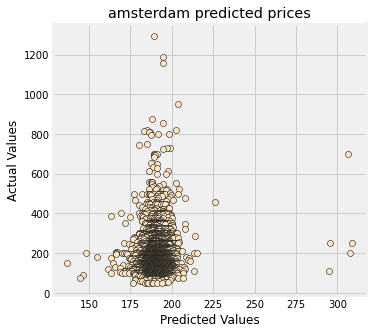

In [42]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('amsterdam predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression function, rooms for 2 or less

In [43]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_amsterdam)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 5402 files in the dataset
There is 1678 to be regressed with accommodates <=2


In [44]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  132.88826140860346
Coefficients:  [ -9.69248908  -5.55423135   9.67549718   0.06524246 -35.56716783
   8.02905617  17.15759704   0.1418586   25.57780918]
LinearRegression()


In [45]:
y_pred2_2 = regr2.predict(X_2)

In [46]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(1676, 3)

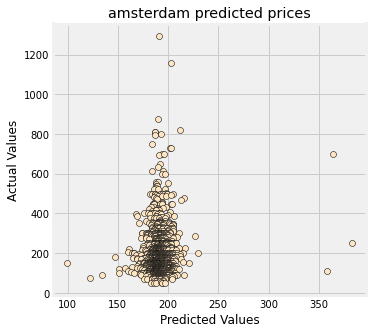

In [47]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('amsterdam predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [48]:
## Regression fucntion, rooms for 2 or less

In [49]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_amsterdam)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 5402 files in the dataset
There is 3172 to be regressed with accommodates <=6


In [50]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  127.40459643462424
Coefficients:  [  0.33777819   1.15337318   0.60479427   0.14797867 -15.8649633
  -0.30731022  11.81180397   5.00516618  11.558619  ]
LinearRegression()


In [51]:
y_pred6_6 = regr6.predict(X_6)

In [52]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(3164, 3)

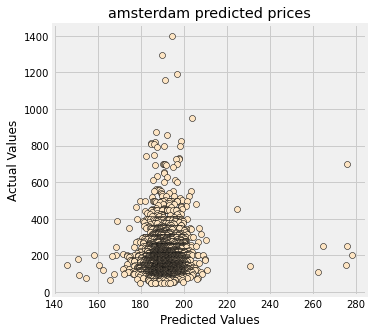

In [53]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('amsterdam predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [54]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_amsterdam)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 5402 files in the dataset
There is 3219 to be regressed


In [55]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  119.91984254519247
Coefficients:  [ -1.56704475   2.55671905   1.48974523   0.15505792 -14.80808797
   0.20842037  10.82308319   6.14034309  11.67477302]
LinearRegression()


In [56]:
y_predall_all = regrall.predict(X_all)

In [57]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(3210, 3)

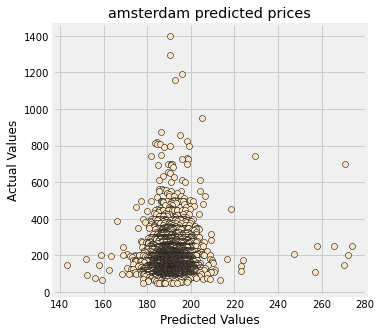

In [58]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('amsterdam predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [59]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
5,44391.0,Entire rental unit,Entire home/apt,4,2.0,2.0,240.0,0,4.70,4.66,4.44,4.66,4.46
6,47061.0,Entire rental unit,Entire home/apt,3,2.0,2.0,120.0,25,4.77,4.77,4.63,4.83,4.63
7,49552.0,Entire guest suite,Entire home/apt,3,2.0,2.0,168.0,0,4.91,4.91,4.89,4.98,4.75
8,49790.0,Boat,Entire home/apt,4,2.0,2.0,250.0,0,4.93,4.96,4.81,4.81,4.73
10,55621.0,Entire rental unit,Entire home/apt,4,2.0,2.0,222.0,0,4.77,4.79,4.72,4.83,4.66


In [60]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  119.91984254519247
Coefficients:  [ -1.56704475   2.55671905   1.48974523   0.15505792 -14.80808797
   0.20842037  10.82308319   6.14034309  11.67477302]
Intercept:  132.88826140860346
Coefficients:  [ -9.69248908  -5.55423135   9.67549718   0.06524246 -35.56716783
   8.02905617  17.15759704   0.1418586   25.57780918]
Intercept:  138.79735211158504
Coefficients:  [ -1.87464142   4.06112203   0.39697952   0.13429838 -22.47039852
   3.24902277  15.59232076   1.78565413  12.16149072]
Intercept:  127.40459643462424
Coefficients:  [  0.33777819   1.15337318   0.60479427   0.14797867 -15.8649633
  -0.30731022  11.81180397   5.00516618  11.558619  ]


In [61]:
df_amsterdam_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
1194,1194,111.0,$595.00,210.748979,99.748979,https://www.airbnb.com/rooms/8920212,52.34139,4.920110,4,Watergraafsmeer,4.61,4.72,4.94,4.89,4.94,4.56,4.56,18
1112,1112,164.0,$550.00,209.875337,45.875337,https://www.airbnb.com/rooms/8006682,52.36058,4.869789,4,De Baarsjes - Oud-West,4.89,4.92,4.97,4.95,4.97,4.87,4.76,38
1699,1699,150.0,"$1,160.00",208.053638,58.053638,https://www.airbnb.com/rooms/14348158,52.38768,4.884550,4,Centrum-West,4.78,4.85,4.58,4.95,4.88,4.83,4.58,42
236,236,950.0,$950.00,205.094285,-744.905715,https://www.airbnb.com/rooms/1038120,52.38865,4.883920,4,Westerpark,4.98,4.89,4.93,4.91,4.95,4.86,4.74,45
199,199,210.0,$245.00,204.969496,-5.030504,https://www.airbnb.com/rooms/916850,52.40666,4.903440,4,Noord-West,4.89,4.91,4.87,4.96,4.98,4.58,4.75,58


## Find the highest predicted in amsterdam - <= 4

In [62]:
df_amsterdam_query_filter['% Diff'] = (df_amsterdam_query_filter['Actual']/df_amsterdam_query_filter['Predicted']-1)* 100
df_amsterdam_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_amsterdam_query_final = df_amsterdam_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_amsterdam_query_final)} listings that meet criteria')
df_amsterdam_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head()


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 1428 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
1194,111.0,210.75,-47.33,4.61,4.72,4.94,4.56,4.56,Watergraafsmeer,https://www.airbnb.com/rooms/8920212,4,18
1112,164.0,209.88,-21.86,4.89,4.92,4.97,4.87,4.76,De Baarsjes - Oud-West,https://www.airbnb.com/rooms/8006682,4,38
1699,150.0,208.05,-27.90,4.78,4.85,4.58,4.83,4.58,Centrum-West,https://www.airbnb.com/rooms/14348158,4,42
236,950.0,205.09,363.20,4.98,4.89,4.93,4.86,4.74,Westerpark,https://www.airbnb.com/rooms/1038120,4,45
199,210.0,204.97,2.45,4.89,4.91,4.87,4.58,4.75,Noord-West,https://www.airbnb.com/rooms/916850,4,58


## Find the best deal in amsterdam - <=4

In [63]:
df_amsterdam_deal = df_amsterdam_query_final[df_amsterdam_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_amsterdam_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
317,50.0,193.63,-74.18,4.90,4.92,4.96,4.79,4.82,Centrum-Oost,https://www.airbnb.com/rooms/1402541,2,540
3284,51.0,190.73,-73.26,4.89,4.94,4.97,4.97,4.88,Zuid,https://www.airbnb.com/rooms/30461243,2,65
1229,50.0,184.55,-72.91,4.89,5.00,4.78,4.67,4.67,Oostelijk Havengebied - Indische Buurt,https://www.airbnb.com/rooms/9402905,2,19
1221,52.0,187.75,-72.30,4.83,4.83,4.75,4.83,4.75,De Pijp - Rivierenbuurt,https://www.airbnb.com/rooms/9327973,4,12
3993,55.0,194.85,-71.77,4.77,4.87,4.93,4.87,4.60,De Baarsjes - Oud-West,https://www.airbnb.com/rooms/39168555,2,30
2191,60.0,188.58,-68.18,4.95,5.00,4.95,4.81,4.86,Zuid,https://www.airbnb.com/rooms/18780017,2,37
1847,60.0,187.09,-67.93,4.70,4.86,4.77,4.73,4.64,Oud-Noord,https://www.airbnb.com/rooms/15785019,2,24
